# Práctica Classical Neuronal Networks

* Alejandro Mayorga Redondo
* Fernando Mondragón Sampedro

En esta práctica, trataremos de desarrollar una red neuronal que permita la correcta clasificación del dataset Fashion-MNIST. Se probarán diferentes modelos a fin de encontrar aquel que realice mejor el trabajo propuesto. Además, también se aplicarán diversas técnicas de regularización, con el fin de mejorar los resultados obtenidos en primera instancia.

In [1]:
#Primer paso: Cargar la database y distribuir las imágenes de entrenamiento y evaluación

from tensorflow . keras . datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


#A mayores, cargamos la librería responsable de representar nuestras gráficas

import matplotlib.pyplot as plt




## Preprocesado

Para comenzar tenemos que cargar el dataset y preprocesar los datos para introducirlos en los modelos.
Para ello, primero convertimos las imágenes en vectores unidimensionales y después, normalizamos los valores en el intervalo [0,1]

In [2]:
#Primeramente, tenemos que preparar los datos de forma que sean fácilmente introducibles en nuestra red. Esto
#implica reorganizar el array original en el que se nos es dada la información, así como para su tipo de datos a
#float
( x_train , y_train ), ( x_test , y_test ) = fashion_mnist . load_data ()
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



Ahora partimos los datos de entrenamiento en entrenamiento y validación para poder comparar el resultado de los diferentes modelos a probar sin tener que ver los casos de test.

In [3]:
#Creamos un tercer grupo de validación


validation_images = train_images[:10000] # Copy of x_train from the begining (0) to 9999
validation_labels = y_train[:10000]




final_training_images = train_images.copy()
train_images = train_images[10000:] # Copy of x_train from 10000 to the end
train_labels = y_train[10000:]

Finalmente, el último paso de preprocesado, es codificar las etiquetas de entrenamiento, validación y testing con one-hot
encoding, resultando en que cada una de estas se transforma en un array de vectores de 10 elementos.

In [4]:
#Realizamos one-hot enconding para así disponer las etiquetas de forma que la red pueda entrenar

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(y_test)
final_training_labels = to_categorical(y_train)


## Diseño y entrenamiento de las redes de neuronas artificiales

Para hallar los mejores hiperparámetros de las redes recurriremos a una Grid Search, es decir, explorar completamente el espacio de hiperparámetros definido. Esto es un proceso costoso, y como se podrá ver más adelante, seguramente podríamos haber obtenido resultados iguales con una Random Search.

En cuanto a los hiperparámetros a probar, nos hemos decantado por los siguientes:

1. __Estructurales__
* __Neuronas por capa__: Hemos probado con  64, 128 y 512 neuronas por capa.
* __Número de capas__: Se utilizan 1 ó 2 capas. En el caso de usar 2 capas, estas son iguales
* __Funciones de activación__: Utilizamos la función "relu" en las capas intermedias y "softmax" en la de salida

2. __De aprendizaje__
* __Optimizador__: Hemos optado por los optimizadores "rmsprop" y "Adam".
* __Learning rate__: Utilizamos learning rates de 0.1, 0.01 y 0.001 siendo este último el valor por defecto de los optimizadores.
* __Número de epochs__: Probamos con 10 y 30 epochs. Al no utilizar early stopping, no querémos un número de epochs muy alto para reducir el tiempo de entrenamiento, pero por si no fueran 10 epochs suficientes, hemos añadido un valor superior. 
* __batch size__: Para este apartado escogemos los valores de 32 y 512. A más pequeño sea el batch size, más actualizaciones de los pesos se harán por lo que el modelo tardará mas en aprender, y es posible que haga mas overfitting ya que con batch sizes más grandes, generaliza más.
* __métricas__: Las métricas escogidas son accuracy como métrica principal, y la categorical cross entropy como función de perdida.

In [5]:
#Opciones a probar

epoch_n = [10,30]
batch_size_n = [32,512]

layers_n = [1,2]
neurons_n = [64,128,512]
learning_rates = [0.1,0.01,0.001]
optimizers = ["rmsprop","Adam"]



Una vez definidos los hiperparámetros a probar, toca explorar ese espacio. Para ello vamos iterando en las listas de hiperparámetros probando todas las combinaciones, y vamos quedándonos con una lista con las accuracies de cada modelo, y otra con los hiperparámetros de dicho modelo para poder recuperar el mejor más adelante.




Accuracy =  0.4440000057220459
counter: 1
Accuracy =  0.337799996137619
counter: 2
Accuracy =  0.853600025177002
counter: 3
Accuracy =  0.8568999767303467
counter: 4
Accuracy =  0.8835999965667725
counter: 5
Accuracy =  0.882099986076355
counter: 6
Accuracy =  0.4708000123500824
counter: 7
Accuracy =  0.32010000944137573
counter: 8
Accuracy =  0.8565000295639038
counter: 9
Accuracy =  0.8543999791145325
counter: 10
Accuracy =  0.887499988079071
counter: 11
Accuracy =  0.8878999948501587
counter: 12
Accuracy =  0.5148000121116638
counter: 13
Accuracy =  0.304500013589859
counter: 14
Accuracy =  0.8572999835014343
counter: 15
Accuracy =  0.8546000123023987
counter: 16
Accuracy =  0.8902999758720398
counter: 17
Accuracy =  0.8937000036239624
counter: 18
Accuracy =  0.1981000006198883
counter: 19
Accuracy =  0.2953999936580658
counter: 20
Accuracy =  0.8118000030517578
counter: 21
Accuracy =  0.8614000082015991
counter: 22
Accuracy =  0.880299985408783
counter: 23
Accuracy =  0.89399999

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy =  0.9010999798774719
counter: 144


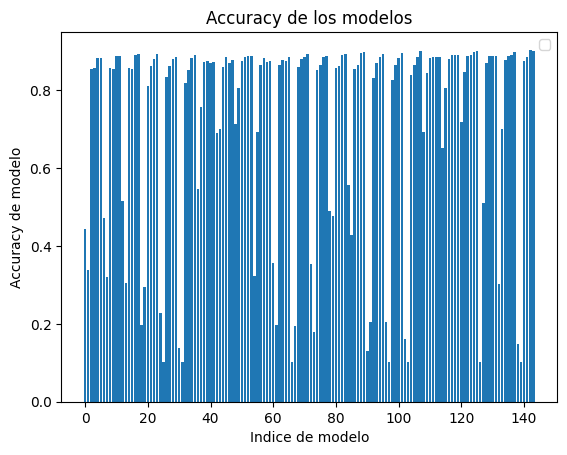

In [6]:


#Ahora loopeamos por los hiperparametros
#2*2*2*3*3*2 = 144 modelos. Aproximadamente 15s por modelo, aprox 40 min para probar todos


counter = 0
list_acc = []
list_opt = []
for epoch in epoch_n: 
    for batch in batch_size_n:
        for capas in layers_n: 
            for neurons in neurons_n: 
                for learning_r in learning_rates:
                    for optimizador in optimizers: 
                        model = keras.Sequential()

                        model.add(layers.Input(shape=(784, )))
                        for i in range(capas):
                            model.add(layers.Dense(neurons, activation="relu"))

                        model.add(layers.Dense(10, activation="softmax"))
                        
                        if optimizador =="rmsprop":
                            opt = keras.optimizers.RMSprop(learning_rate=learning_r)
                        if optimizador =="Adam":
                            opt = keras.optimizers.Adam(learning_rate=learning_r)
                        
                        model.compile(optimizer=opt, 
                                  loss="categorical_crossentropy",
                                  metrics=["accuracy"])

                        history =model.fit(train_images, train_labels, epochs=epoch,verbose=0, batch_size=batch, 
                            validation_data = (validation_images, validation_labels))
                        
                        history_dict = history.history
                        result_val = max(history_dict['val_accuracy'])
                        print("Accuracy = ",result_val)
                        
#Guardamos todos los modelos  if result[0]< result_val:
                        list_acc+=[result_val]
                                  
                        list_opt+= ["epoch: "+ str(epoch)+ "\n batch: " +str(batch)+ "\n layers: " +str(capas)+ "\n neurons: " 
                                    +str(neurons)+ "\n learning rate: " +str(learning_r) +" optimizador: " +optimizador]                     
                        counter +=1
                        print("counter:",counter)     






#Mostramos los resultados de las accuracies obtenidas para cada modelo


plt.bar(range(len(list_acc)), list_acc)

plt.title('Accuracy de los modelos')
plt.xlabel('Indice de modelo')
plt.ylabel('Accuracy de modelo')
plt.legend()
plt.show()




Como podemos observar, muchos modelos han dado resultados muy similares, por lo que seguramente habríamos encontrado alguno de esos modelos con una
búsqueda aleatoria del espacio de hiperparámentros, permitiéndonos ahorrar tiempo o en el mismo tiempo haber explorado un espacio más grande.

De cualquier forma, ahora nos interesa recuperar los mejores modelos y sus opciones. En el siguiente fragmento de código recuperamos e imprimimos los mejores 5 modelos junto a sus opciones, así como los peores 5.

In [7]:
#Nos quedamos con los 5 mejores y peores modelos

cut = 5

bottom = sorted(range(len(list_acc)), key=lambda i: list_acc[i], reverse=True)[-cut:]
top = sorted(range(len(list_acc)), key=lambda i: list_acc[i])[-cut:]



for x in range(cut):
    print("Top ", cut-x, " model: Nº = ", top[x],"Accuracy = ",list_acc[top[x]], "options: \n", list_opt[top[x]])
    
for y in range(cut):  
    print("Bottom ", cut-y, " model:Nº = ", bottom[x],"Accuracy = ",list_acc[bottom[x]], "options: \n ", list_opt[bottom[y]])






Top  5  model: Nº =  124 Accuracy =  0.8992000222206116 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 512
 learning rate: 0.001 optimizador: rmsprop
Top  4  model: Nº =  125 Accuracy =  0.9003999829292297 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  3  model: Nº =  143 Accuracy =  0.9010999798774719 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  2  model: Nº =  107 Accuracy =  0.9013000130653381 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  1  model: Nº =  142 Accuracy =  0.9042999744415283 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: rmsprop
Bottom  5  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.1 optimizador: Adam
Bottom  4  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
 

Empezando por los peores resultados, podemos identificar que el learning rate = 0.1 ha sido un factor común a todos ellos. Un valor tan alto
ha impedido al modelo aprender.

En cuanto al top 5, encontramos un poco de todo. Tenemos redes con 1 o 2 capas y distintos optimizadores. Lo que si que comparten
los mejores modelos es el learning rate = 0.001, los 30 epoch y las 512 neuronas por capa.

Nos quedamos con el mejor modelo obtenido en la ejecución actual (la cual dejamos comentada en el siguiente recuadro de código) y trabajaremos en las
siguientes secciones con estos datos.

Top  1  model: Nº =  142 Accuracy =  0.9042 options: 
 - epoch: 30
 - batch: 512
 - layers: 2
 - neurons: 512
 - learning rate: 0.001 optimizador: rmsprop

In [8]:
"""
Top  5  model: Nº =  124 Accuracy =  0.8992000222206116 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 512
 learning rate: 0.001 optimizador: rmsprop
Top  4  model: Nº =  125 Accuracy =  0.9003999829292297 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  3  model: Nº =  143 Accuracy =  0.9010999798774719 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  2  model: Nº =  107 Accuracy =  0.9013000130653381 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: Adam
Top  1  model: Nº =  142 Accuracy =  0.9042999744415283 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 512
 learning rate: 0.001 optimizador: rmsprop
Bottom  5  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.1 optimizador: Adam
Bottom  4  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 32
 layers: 2
 neurons: 512
 learning rate: 0.1 optimizador: Adam
Bottom  3  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 64
 learning rate: 0.1 optimizador: rmsprop
Bottom  2  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 10
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.1 optimizador: Adam
Bottom  1  model:Nº =  139 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 512
 learning rate: 0.1 optimizador: Adam
 """

'\nTop  5  model: Nº =  124 Accuracy =  0.8924000263214111 options: \n epoch: 30\n batch: 512\n layers: 1\n neurons: 128\n learning rate: 0.001 optimizador: rmsprop\nTop  4  model: Nº =  101 Accuracy =  0.8924999833106995 options: \n epoch: 30\n batch: 32\n layers: 2\n neurons: 64\n learning rate: 0.001 optimizador: Adam\nTop  3  model: Nº =  89 Accuracy =  0.8946999907493591 options: \n epoch: 30\n batch: 32\n layers: 1\n neurons: 128\n learning rate: 0.001 optimizador: Adam\nTop  2  model: Nº =  107 Accuracy =  0.8960000276565552 options: \n epoch: 30\n batch: 32\n layers: 2\n neurons: 128\n learning rate: 0.001 optimizador: Adam\nTop  1  model: Nº =  142 Accuracy =  0.8980000019073486 options: \n epoch: 30\n batch: 512\n layers: 2\n neurons: 128\n learning rate: 0.001 optimizador: rmsprop\nBottom  5  model:Nº =  31 Accuracy =  0.10220000147819519 options: \n  epoch: 30\n batch: 512\n layers: 2\n neurons: 16\n learning rate: 0.1 optimizador: rmsprop\nBottom  4  model:Nº =  31 Accurac

Una vez obtenido el mejor modelo, vamos a verlo de forma gráfica.

Epoch 1/30
98/98 [==============================] - 1s 9ms/step - loss: 0.7503 - accuracy: 0.7346 - val_loss: 0.5620 - val_accuracy: 0.7943
Epoch 2/30
98/98 [==============================] - 1s 8ms/step - loss: 0.4804 - accuracy: 0.8221 - val_loss: 0.4778 - val_accuracy: 0.8232
Epoch 3/30
98/98 [==============================] - 1s 7ms/step - loss: 0.4137 - accuracy: 0.8466 - val_loss: 0.3930 - val_accuracy: 0.8561
Epoch 4/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3773 - accuracy: 0.8585 - val_loss: 0.4306 - val_accuracy: 0.8411
Epoch 5/30
98/98 [==============================] - 1s 7ms/step - loss: 0.3490 - accuracy: 0.8707 - val_loss: 0.3897 - val_accuracy: 0.8548
Epoch 6/30
98/98 [==============================] - 1s 8ms/step - loss: 0.3278 - accuracy: 0.8771 - val_loss: 0.3460 - val_accuracy: 0.8702
Epoch 7/30
98/98 [==============================] - 1s 8ms/step - loss: 0.3116 - accuracy: 0.8829 - val_loss: 0.3568 - val_accuracy: 0.8626
Epoch 8/30
98/98 [==

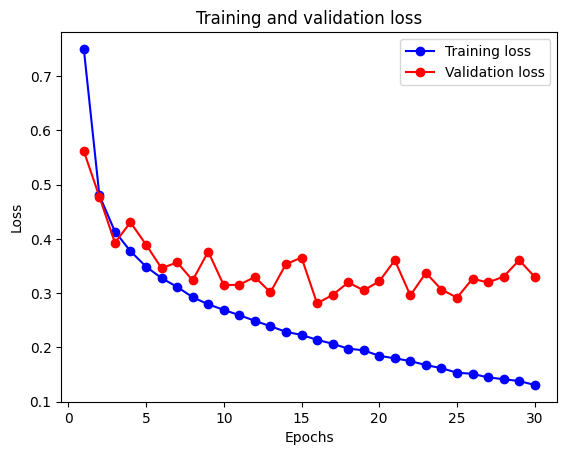

In [21]:
#Graficamos la funcion de perdida y la accuracy del mejor modelo.



best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))




history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Se puede observar que desde el epoch 8, los resultados de validación no mejoran.
Ahora, para ver la acuraccy real del modelo, vamos a entrenarlo con los datos de entrenamiento y validación juntos, y evaluarlo con los de testing.

In [35]:
#Ahora ejecutamos el modelo sobre los datos de test para ver su accuracy real

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)

Epoch 1/30
118/118 [==============================] - 2s 9ms/step - loss: 0.7222 - accuracy: 0.7459
Epoch 2/30
118/118 [==============================] - 1s 10ms/step - loss: 0.4595 - accuracy: 0.8304
Epoch 3/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3950 - accuracy: 0.8533
Epoch 4/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3585 - accuracy: 0.8647
Epoch 5/30
118/118 [==============================] - 1s 9ms/step - loss: 0.3328 - accuracy: 0.8757
Epoch 6/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3152 - accuracy: 0.8814
Epoch 7/30
118/118 [==============================] - 1s 10ms/step - loss: 0.2956 - accuracy: 0.8896
Epoch 8/30
118/118 [==============================] - 1s 10ms/step - loss: 0.2832 - accuracy: 0.8939
Epoch 9/30
118/118 [==============================] - 1s 10ms/step - loss: 0.2706 - accuracy: 0.8976
Epoch 10/30
118/118 [==============================] - 1s 10ms/step - loss: 0.2581 - accuracy

La acuracy final obtenida es 0.8939.

# REGULARIZACIÓN
Ahora vamos a probar algunos de los modelos anteriores utilizando las técnicas de regularización de "dropout" y "batch normalization" para tratar de obtener mejores resultados.

## Dropout

Primero probaremos el método de Dropout. Utilizaremos un 20% de dropout.

In [22]:
best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
    best_model.add(layers.Dropout(0.2))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))


results = best_model.evaluate(test_images, test_labels)

print(results)


Epoch 1/30
98/98 [==============================] - 2s 11ms/step - loss: 0.7651 - accuracy: 0.7228 - val_loss: 0.4813 - val_accuracy: 0.8278
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 0.4940 - accuracy: 0.8191 - val_loss: 0.4341 - val_accuracy: 0.8405
Epoch 3/30
98/98 [==============================] - 1s 10ms/step - loss: 0.4320 - accuracy: 0.8399 - val_loss: 0.4126 - val_accuracy: 0.8454
Epoch 4/30
98/98 [==============================] - 1s 10ms/step - loss: 0.3897 - accuracy: 0.8559 - val_loss: 0.3768 - val_accuracy: 0.8599
Epoch 5/30
98/98 [==============================] - 1s 11ms/step - loss: 0.3668 - accuracy: 0.8643 - val_loss: 0.3879 - val_accuracy: 0.8496
Epoch 6/30
98/98 [==============================] - 1s 11ms/step - loss: 0.3450 - accuracy: 0.8720 - val_loss: 0.3800 - val_accuracy: 0.8605
Epoch 7/30
98/98 [==============================] - 1s 11ms/step - loss: 0.3313 - accuracy: 0.8758 - val_loss: 0.3260 - val_accuracy: 0.8748
Epoch 8/30
98/

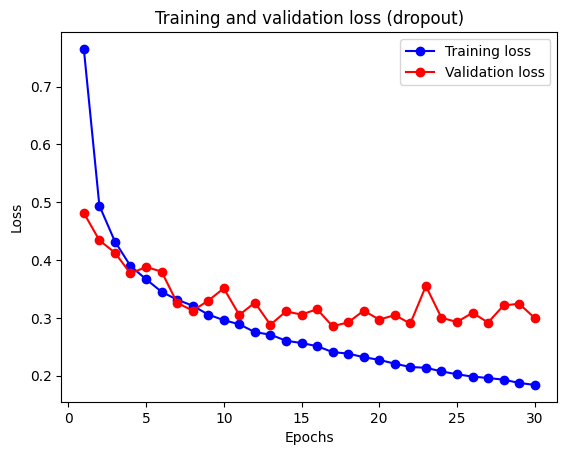

In [23]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss (dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

En la gráfica, podemos apreciar como no se han producido cambios significativos en el largo plazo, si bien la variación entre epochs para los resultados de validación varían menos entre iteraciones. Pasemos ahora a probarlo sobre el conjunto de test.

In [24]:

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
    best_model.add(layers.Dropout(0.2))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)


Epoch 1/30
118/118 [==============================] - 1s 9ms/step - loss: 0.7242 - accuracy: 0.7377
Epoch 2/30
118/118 [==============================] - 1s 9ms/step - loss: 0.4722 - accuracy: 0.8258
Epoch 3/30
118/118 [==============================] - 1s 9ms/step - loss: 0.4117 - accuracy: 0.8467
Epoch 4/30
118/118 [==============================] - 1s 9ms/step - loss: 0.3778 - accuracy: 0.8602
Epoch 5/30
118/118 [==============================] - 1s 9ms/step - loss: 0.3520 - accuracy: 0.8694
Epoch 6/30
118/118 [==============================] - 1s 9ms/step - loss: 0.3349 - accuracy: 0.8763
Epoch 7/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3212 - accuracy: 0.8797
Epoch 8/30
118/118 [==============================] - 1s 10ms/step - loss: 0.3057 - accuracy: 0.8859
Epoch 9/30
118/118 [==============================] - 1s 9ms/step - loss: 0.2971 - accuracy: 0.8890
Epoch 10/30
118/118 [==============================] - 1s 9ms/step - loss: 0.2878 - accuracy: 0.89

### Resultados del dropout

El resultado del accuracy para esta técnica es de 0.8862. Un poco más bajo que el valor obtenido sin regularización. Esto puede ser fruto del azar, pero indica que seguramente el modelo inicial no ha sobreaprendido, por lo que la regularización no consigue una ventaja.

## Batch normalization

De forma similar al caso anterior, implementamos la batch regularization añadiendo capas intermedias de regularización.


In [25]:
best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
    best_model.add(layers.BatchNormalization())
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))



print(results)



Epoch 1/30
98/98 [==============================] - 2s 11ms/step - loss: 0.5552 - accuracy: 0.8098 - val_loss: 0.7221 - val_accuracy: 0.7901
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 0.3649 - accuracy: 0.8660 - val_loss: 0.4806 - val_accuracy: 0.8475
Epoch 3/30
98/98 [==============================] - 1s 9ms/step - loss: 0.3165 - accuracy: 0.8819 - val_loss: 0.4644 - val_accuracy: 0.8320
Epoch 4/30
98/98 [==============================] - 1s 9ms/step - loss: 0.2856 - accuracy: 0.8940 - val_loss: 0.4319 - val_accuracy: 0.8496
Epoch 5/30
98/98 [==============================] - 1s 9ms/step - loss: 0.2620 - accuracy: 0.9012 - val_loss: 0.4800 - val_accuracy: 0.8351
Epoch 6/30
98/98 [==============================] - 1s 9ms/step - loss: 0.2433 - accuracy: 0.9090 - val_loss: 0.5460 - val_accuracy: 0.8250
Epoch 7/30
98/98 [==============================] - 1s 9ms/step - loss: 0.2288 - accuracy: 0.9141 - val_loss: 0.3941 - val_accuracy: 0.8660
Epoch 8/30
98/98 [=

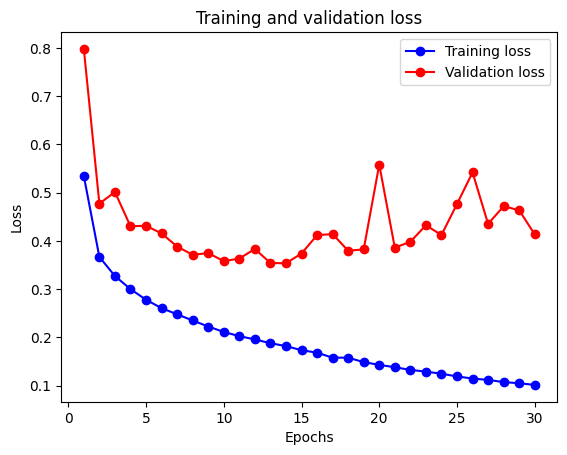

In [15]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


La función de perdida tarda unos 10 epoch en alcanzar el mínimo, pero se aprecia como a partir del epoch 15 sobreentrena. Vamos a ver que tal funciona con los datos de test.

In [36]:

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, activation="relu"))
    best_model.add(layers.BatchNormalization())
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)



Epoch 1/30
118/118 [==============================] - 2s 11ms/step - loss: 0.5179 - accuracy: 0.8209
Epoch 2/30
118/118 [==============================] - 1s 11ms/step - loss: 0.3476 - accuracy: 0.8709
Epoch 3/30
118/118 [==============================] - 1s 11ms/step - loss: 0.3051 - accuracy: 0.8872
Epoch 4/30
118/118 [==============================] - 1s 11ms/step - loss: 0.2754 - accuracy: 0.8967
Epoch 5/30
118/118 [==============================] - 2s 13ms/step - loss: 0.2565 - accuracy: 0.9048
Epoch 6/30
118/118 [==============================] - 2s 13ms/step - loss: 0.2390 - accuracy: 0.9105
Epoch 7/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2245 - accuracy: 0.9149
Epoch 8/30
118/118 [==============================] - 1s 12ms/step - loss: 0.2129 - accuracy: 0.9199
Epoch 9/30
118/118 [==============================] - 1s 11ms/step - loss: 0.1998 - accuracy: 0.9231
Epoch 10/30
118/118 [==============================] - 1s 11ms/step - loss: 0.1887 - accura

### Resultados de la batch normalization

 Una vez más, apreciamos que la accuracy no se ha visto beneficiado del método de regularización (al contrario, 
ha empeorado en un 4%). Podemos concluír como con la técnica anterior que el modelo inicial no estaba sobreentrenado.

## Weight regularization


Como última técnica de regularización vamos a probar la weight regularization con parámetros l1 = 0,001 y l2 = 0,001.

In [28]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)



best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001, 0.001), activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,
                         validation_data = (validation_images, validation_labels))


results = best_model.evaluate(test_images, test_labels)

print(results)



Epoch 1/30
98/98 [==============================] - 1s 10ms/step - loss: 9.5155 - accuracy: 0.6669 - val_loss: 3.0091 - val_accuracy: 0.6755
Epoch 2/30
98/98 [==============================] - 1s 9ms/step - loss: 2.1325 - accuracy: 0.7354 - val_loss: 1.6668 - val_accuracy: 0.7833
Epoch 3/30
98/98 [==============================] - 1s 9ms/step - loss: 1.5059 - accuracy: 0.7634 - val_loss: 1.3694 - val_accuracy: 0.7746
Epoch 4/30
98/98 [==============================] - 1s 9ms/step - loss: 1.2974 - accuracy: 0.7794 - val_loss: 1.2572 - val_accuracy: 0.7777
Epoch 5/30
98/98 [==============================] - 1s 9ms/step - loss: 1.2032 - accuracy: 0.7905 - val_loss: 1.1622 - val_accuracy: 0.8050
Epoch 6/30
98/98 [==============================] - 1s 8ms/step - loss: 1.1484 - accuracy: 0.7996 - val_loss: 1.1845 - val_accuracy: 0.7652
Epoch 7/30
98/98 [==============================] - 1s 8ms/step - loss: 1.1130 - accuracy: 0.8064 - val_loss: 1.0926 - val_accuracy: 0.8116
Epoch 8/30
98/98 [=

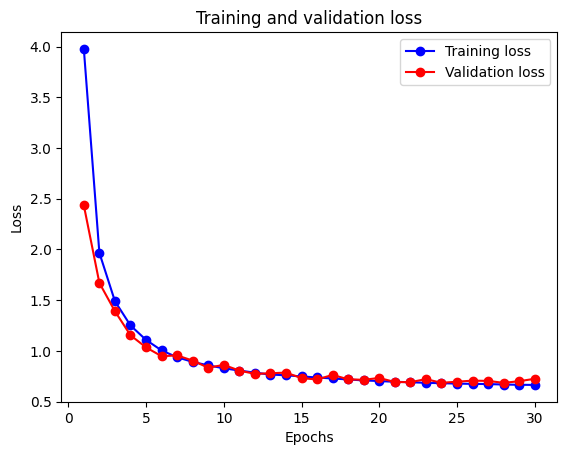

In [18]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Si bien esta vez parece que la función de pérdida para el conjunto de validación es más estable y mejor que en los
otros métodos, basta con fijarnos en el eje y de la gráfica para darnos cuenta que está vez se representa hasta el 
4.0. De hecho, el resultado final en validación da 0.8379, considerablemente peor que todo lo visto hasta ahora.
Procedemos con la evaluación de este modelo sobre el conjunto de test.

In [30]:

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(0.001, 0.001), activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)




Epoch 1/30
118/118 [==============================] - 1s 8ms/step - loss: 8.4042 - accuracy: 0.6761
Epoch 2/30
118/118 [==============================] - 1s 8ms/step - loss: 1.8333 - accuracy: 0.7469
Epoch 3/30
118/118 [==============================] - 1s 8ms/step - loss: 1.3791 - accuracy: 0.7766
Epoch 4/30
118/118 [==============================] - 1s 8ms/step - loss: 1.2319 - accuracy: 0.7898
Epoch 5/30
118/118 [==============================] - 1s 8ms/step - loss: 1.1481 - accuracy: 0.8005
Epoch 6/30
118/118 [==============================] - 1s 9ms/step - loss: 1.1016 - accuracy: 0.8070
Epoch 7/30
118/118 [==============================] - 1s 8ms/step - loss: 1.0707 - accuracy: 0.8098
Epoch 8/30
118/118 [==============================] - 1s 8ms/step - loss: 1.0502 - accuracy: 0.8155
Epoch 9/30
118/118 [==============================] - 1s 8ms/step - loss: 1.0354 - accuracy: 0.8178
Epoch 10/30
118/118 [==============================] - 1s 8ms/step - loss: 1.0135 - accuracy: 0.8224

### Resultados de la weigth regularization

Es fácil ver que la accuracy obteniendo es la peor hasta el momento (0.8172, mientras que la del modelo sin regularización es 0.8939). Por ende, podemos concluír con que este es el peor método de normalización de entre los 3 probados.

## Conclusiones regularización

Ninguno de los modelos ha sido capaz de obtener valores de precisión sustancialmente mejores al modelo base. Esto 
es lógico, ya que el dataset Fashion-MNIST no suele dar problemas de overfitting. Por ende, podemos determinar que, si bien la regularización resulta útil es muchos dominios, este no es uno de ellos.


# Resultados

Nuestro mejor modelo ha conseguido una accuracy del 0.89399, es decir, identifíca correctamente la prenda de ropa en el 89,399% de los casos. Hemos optado por usar esta métrica ya que nos es indiferente identificar bien o mal alguna prenda en particular. El modelo base fue entrenado con os parámetros siguientes



| Hiperparámetro                                          | Valor |
| ----------------------------------------------- | -------- |
| Número de epochs                                            | 30   |
| Tamaño de batch                                            | 512   |
| Capas                                            | 2   |
| Neuronas por capa                                            | 512   |
| Tasa de aprendizaje                                            | 0.001   |


En cuanto a las técnicas de regularización, todas nos han dado modelos peores. Esto seguramente sea fruto de que el modelo de partida no ha sobreaprendido mucho y estas técnicas sirven precisamente para solucionar el problema del overfittig. En la siguiente tabla se puede ver un resumen de todos los resultados.

| Modelo                                          | Accuracy |
| ----------------------------------------------- | -------- |
| Base                                            | 0.8939   |
| Dropout (0.2)                                   | 0.8862   |
| Batch normalization                             | 0.8560   |
| Weight regularization (l1 = 0.001, l2 = 0.001)                    | 0.8172   |


### Trabajo futuro
Examinando el ranking de los mejores 5 modelos, podemos ver que comparten 3 hiperparámetros (learning rate, epoch y neuronas por capa) por lo que sería interesante explorar un nuevo espacio de hiperparámetros en los que estos 3 tengas más opciones, ya que parecen un factor limitante. Por otro lado, probamos a intentar mejorar los resultados obtenidos mediante el uso de más neuronas, pero no obtuvimos salidEsto no nos ha sido posible por falta de tiempo aunque hicimos una prueba con el mejor modelo cambiando a 1024 neuronas por capa y no dio mejores resultados.